In [1]:
import pandas as pd
import statistics as st
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('exp2.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df = df.drop(['DiabetesPedigreeFunction'], axis=1)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [8]:
df = df.rename(columns={"BloodPressure": "BP", "SkinThickness": "SkinThick"})
df.head(5)

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [9]:
df.shape

(768, 8)

In [10]:
df.size

6144

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [12]:
df.count()

Pregnancies    768
Glucose        768
BP             768
SkinThick      768
Insulin        768
BMI            768
Age            768
Outcome        768
dtype: int64

In [13]:
df = df.drop_duplicates()
df.head(5)

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [15]:
print(df.isnull().sum())

Pregnancies    0
Glucose        0
BP             0
SkinThick      0
Insulin        0
BMI            0
Age            0
Outcome        0
dtype: int64


In [16]:
df=df.dropna()
df.count()

Pregnancies    768
Glucose        768
BP             768
SkinThick      768
Insulin        768
BMI            768
Age            768
Outcome        768
dtype: int64

In [17]:
print(df.isnull().sum())

Pregnancies    0
Glucose        0
BP             0
SkinThick      0
Insulin        0
BMI            0
Age            0
Outcome        0
dtype: int64


<Axes: xlabel='BP'>

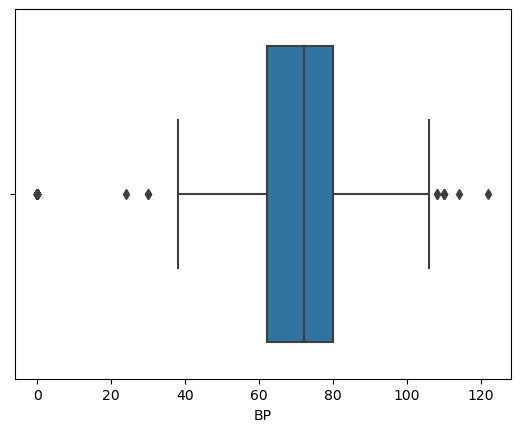

In [18]:
sns.boxplot(x=df['BP'])

<Axes: xlabel='BMI'>

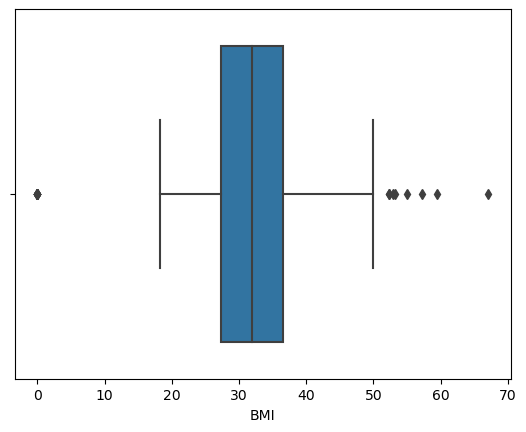

In [19]:
sns.boxplot(x=df['BMI'])

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies      5.00
Glucose         41.25
BP              18.00
SkinThick       32.00
Insulin        127.25
BMI              9.30
Age             17.00
Outcome          1.00
dtype: float64


In [21]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(664, 8)

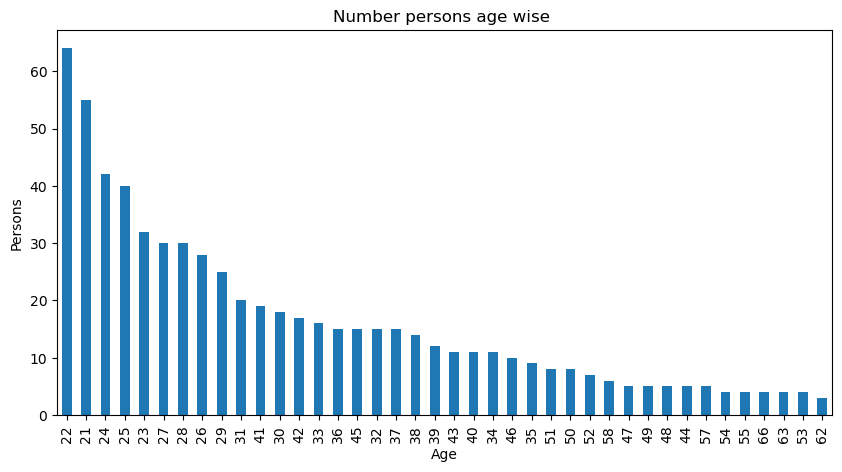

In [22]:
df.Age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number persons age wise ")
plt.ylabel('Persons')
plt.xlabel('Age');

In [23]:
corr_matrix_pearson=df.corr(method='pearson')
df.corr(method='pearson')

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.136993,0.214846,-0.102371,-0.119977,0.018466,0.574038,0.215557
Glucose,0.136993,1.000000,0.242764,-0.003448,0.234189,0.211942,0.281988,0.487862
BP,0.214846,0.242764,1.000000,0.028891,-0.059919,0.294043,0.354548,0.178809
SkinThick,-0.102371,-0.003448,0.028891,1.000000,0.487334,0.387165,-0.147644,0.051328
Insulin,-0.119977,0.234189,-0.059919,0.487334,1.000000,0.186660,-0.094220,0.106397
BMI,0.018466,0.211942,0.294043,0.387165,0.186660,1.000000,0.057767,0.277339
Age,0.574038,0.281988,0.354548,-0.147644,-0.094220,0.057767,1.000000,0.254738
Outcome,0.215557,0.487862,0.178809,0.051328,0.106397,0.277339,0.254738,1.000000


<Axes: >

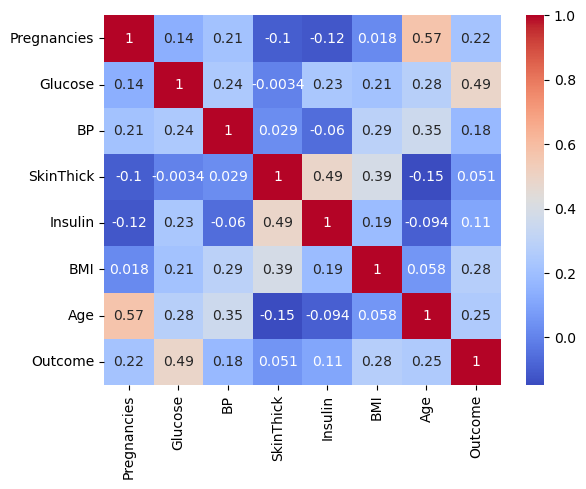

In [24]:
sns.heatmap(corr_matrix_pearson, cmap="coolwarm", annot=True)

In [25]:
for col in df.columns:
 print("The minimum value for the columns {} is {}".format(col, df[col].min()))

The minimum value for the columns Pregnancies is 0
The minimum value for the columns Glucose is 44
The minimum value for the columns BP is 38
The minimum value for the columns SkinThick is 0
The minimum value for the columns Insulin is 0
The minimum value for the columns BMI is 18.2
The minimum value for the columns Age is 21
The minimum value for the columns Outcome is 0


In [26]:
for col in df.columns:
 print("The maximum value for the columns {} is {}".format(col, df[col].max()))

The maximum value for the columns Pregnancies is 13
The maximum value for the columns Glucose is 199
The maximum value for the columns BP is 106
The maximum value for the columns SkinThick is 60
The maximum value for the columns Insulin is 318
The maximum value for the columns BMI is 50.0
The maximum value for the columns Age is 66
The maximum value for the columns Outcome is 1


In [27]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
 print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.8303200372104175
Skewness for the column Glucose is 0.6006622635803669
Skewness for the column BP is 0.07513838542901348
Skewness for the column SkinThick is -0.08410738953649566
Skewness for the column Insulin is 1.00082072165367
Skewness for the column BMI is 0.2870192315572595
Skewness for the column Age is 1.015873885492842
